In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import zipfile

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# open zipped dataset
with zipfile.ZipFile("data.zip") as z:
   # open the csv file in the dataset
   with z.open("data/HR_data.csv") as f:
       
      # read the dataset
      data = pd.read_csv(f, index_col=0)

num_cols = data.columns[:51] 
cat_cols = data.columns[51:]

missing_data = data.isnull().sum()
missing_data = missing_data[missing_data > 0]
missing_data.sort_values(inplace=True)

missing_rows = data.isnull().any(axis=1)
missing_cols = missing_data.index

data[missing_rows][missing_cols]

,EDA_TD_P_RT,EDA_TD_P_ReT,attentive,afraid,active,inspired,determined
104,2.321429,1.892857,NaN,NaN,NaN,2.0,NaN
120,1.968750,2.703125,2.0,1.0,2.0,2.0,NaN
122,3.387500,2.367647,3.0,1.0,2.0,NaN,3.0
125,2.108696,1.911765,3.0,4.0,2.0,NaN,2.0
272,NaN,NaN,3.0,1.0,3.0,2.0,3.0


In [3]:
# Calculate mean of the column within the same Round, Phase, Puzzler and Cohort
means_for_missing = data.groupby(['Round', 'Phase', 'Puzzler', 'Cohort']).mean().reset_index()

# Replace missing values
for index, row in data.iterrows():
    if row.isnull().any():
        mean_row = means_for_missing[(means_for_missing['Round'] == row['Round']) 
                                     & (means_for_missing['Phase'] == row['Phase']) 
                                     & (means_for_missing['Puzzler'] == row['Puzzler']) 
                                     & (means_for_missing['Cohort'] == row['Cohort'])]
        
        # only replace the values that are missing
        for col in row[row.isnull()].index:
            # round the questionnaire values
            if col in ['attentive', 'afraid', 'active', 'inspired', 'determined']:
                data.at[index, col] = np.round(mean_row[col].values[0])
            else:
                data.at[index, col] = mean_row[col].values[0]

# Check that it works as expected
data[missing_rows][missing_cols]

,EDA_TD_P_RT,EDA_TD_P_ReT,attentive,afraid,active,inspired,determined
104,2.321429,1.892857,3.0,1.0,2.0,2.0,3.0
120,1.968750,2.703125,2.0,1.0,2.0,2.0,2.0
122,3.387500,2.367647,3.0,1.0,2.0,2.0,3.0
125,2.108696,1.911765,3.0,4.0,2.0,2.0,2.0
272,2.557692,2.409091,3.0,1.0,3.0,2.0,3.0


In [4]:
data['Cohort'] = data['Cohort'].apply(lambda x: 'D1_3' if x in ['D1_4', 'D1_5', 'D1_6'] else x)

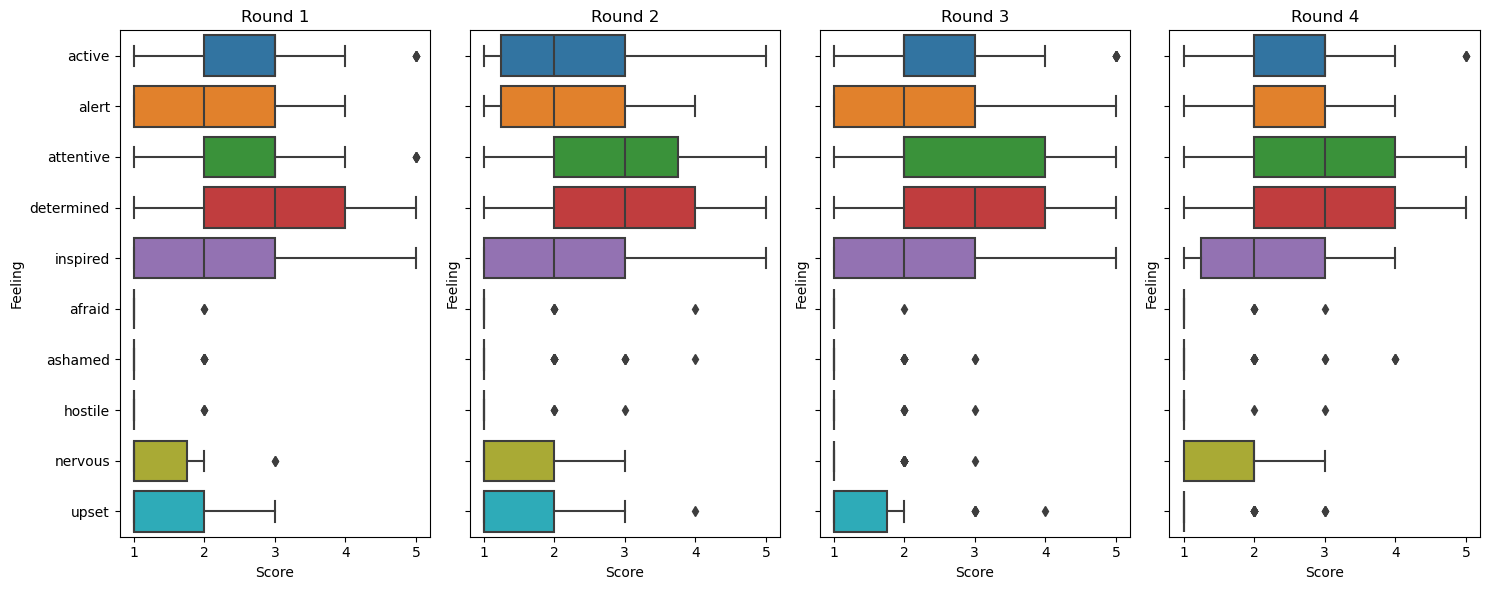

In [5]:
feelings = ['active', 'alert', 'attentive', 'determined', 'inspired', 'afraid', 'ashamed', 'hostile', 'nervous', 'upset']
# make a seaborn boxplot of each feeling for each round

fig, axs = plt.subplots(1,4, figsize=(15,6), sharey=True)

# Each subplot represents a round. Have score on the x-axis and feeling in the y-axis and show horizontal boxplot for each feeling
for i, round_num in enumerate(data['Round'].unique()):
    #sns.boxplot(data=data[data['Round'] == round_num][feelings], ax=axs[i])
    sns.boxplot(x = 'value', y = 'variable', data = pd.melt(data[data['Round'] == round_num][feelings]), ax=axs[i])
    axs[i].set_title(f'Round {i+1}')
    axs[i].set_ylabel('Feeling')
    axs[i].set_xlabel('Score')

plt.tight_layout()

plt.show()


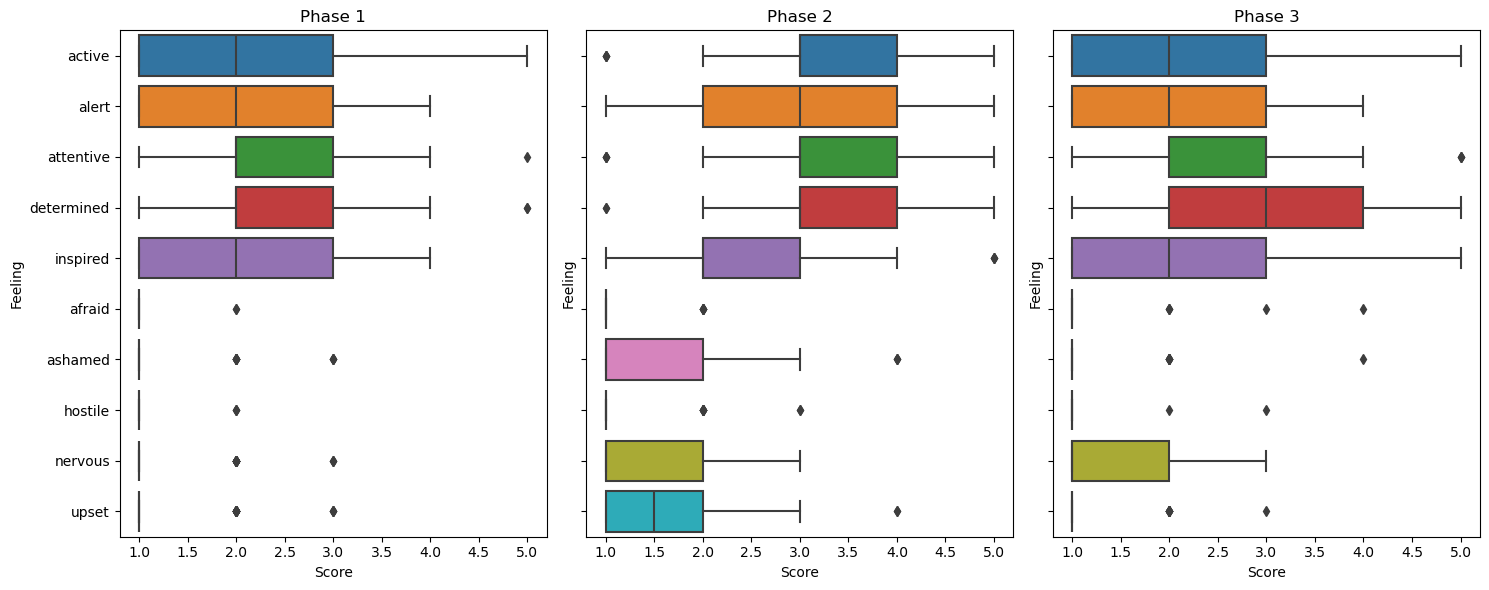

In [6]:
feelings = ['active', 'alert', 'attentive', 'determined', 'inspired', 'afraid', 'ashamed', 'hostile', 'nervous', 'upset']
# make a seaborn boxplot of each feeling for each round

fig, axs = plt.subplots(1,3, figsize=(15,6), sharey=True)

# Each subplot represents a round. Have score on the x-axis and feeling in the y-axis and show horizontal boxplot for each feeling
for i, phase_num in enumerate(data['Phase'].unique()):
    #sns.boxplot(data=data[data['Round'] == round_num][feelings], ax=axs[i])
    sns.boxplot(x = 'value', y = 'variable', data = pd.melt(data[data['Phase'] == phase_num][feelings]), ax=axs[i])
    axs[i].set_title(f'Phase {i+1}')
    axs[i].set_ylabel('Feeling')
    axs[i].set_xlabel('Score')

plt.tight_layout()

plt.show()

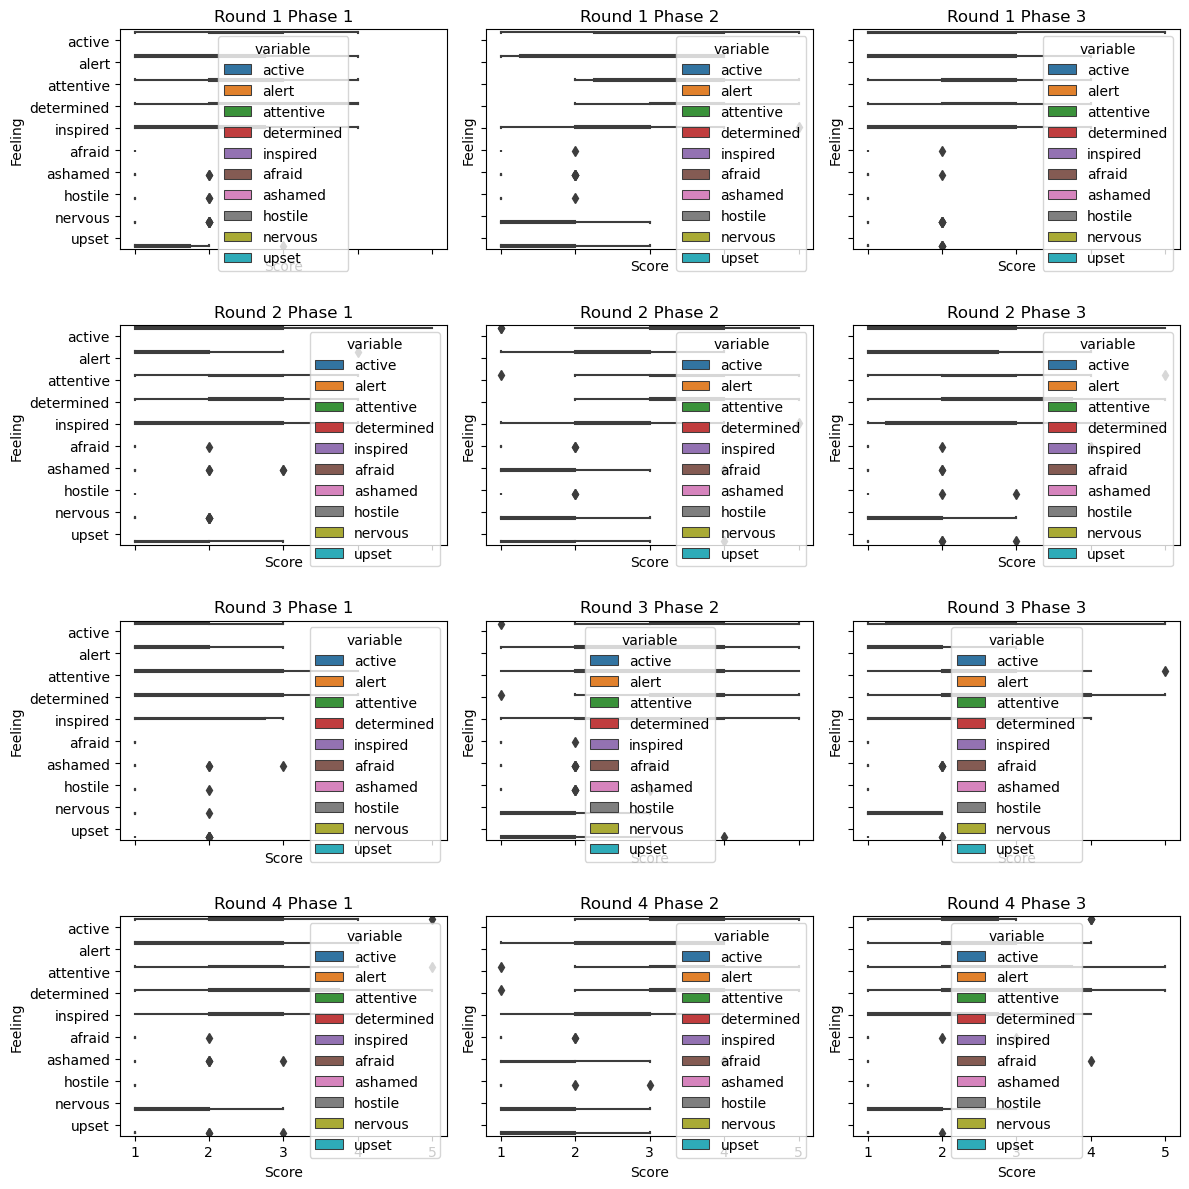

In [7]:
fig, axs = plt.subplots(4,3, figsize=(12,12), sharey=True, sharex=True)

for i, round_num in enumerate(data['Round'].unique()):
    for j, phase_num in enumerate(data['Phase'].unique()):
        sns.boxplot(x = 'value', y = 'variable', data = pd.melt(data[(data['Round'] == round_num) & (data['Phase'] == phase_num)][feelings]), ax=axs[i,j], hue='variable')
        axs[i,j].set_title(f'Round {i+1} Phase {j+1}')
        axs[i,j].set_ylabel('Feeling')
        axs[i,j].set_xlabel('Score')
        # color by feeling


plt.tight_layout()

plt.show()

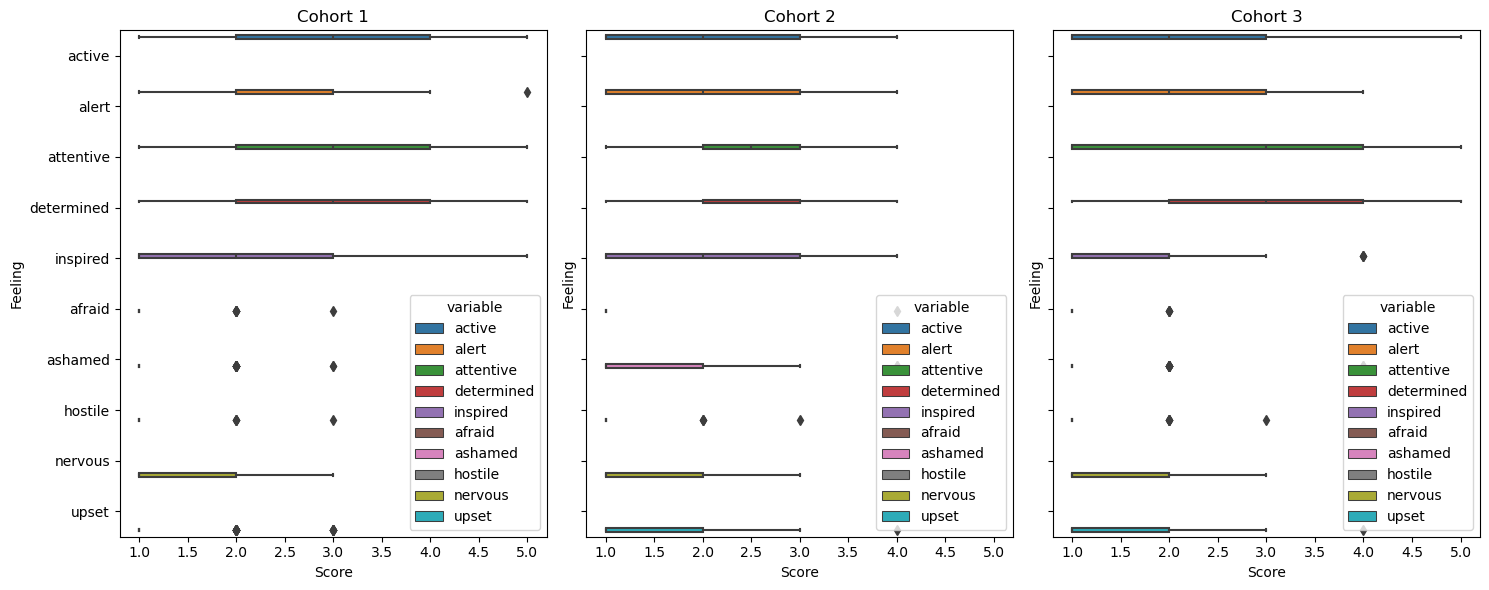

In [8]:
# make a seaborn boxplot of each feeling for each round

fig, axs = plt.subplots(1,3, figsize=(15,6), sharey=True, sharex=True)

# Each subplot represents a round. Have score on the x-axis and feeling in the y-axis and show horizontal boxplot for each feeling
for i, cohort_num in enumerate(data['Cohort'].unique()):
    #sns.boxplot(data=data[data['Round'] == round_num][feelings], ax=axs[i])
    sns.boxplot(x = 'value', y = 'variable', data = pd.melt(data[data['Cohort'] == cohort_num][feelings]), ax=axs[i], hue='variable')
    axs[i].set_title(f'Cohort {i+1}')
    axs[i].set_ylabel('Feeling')
    axs[i].set_xlabel('Score')

plt.tight_layout()

plt.show()

/Users/kathrinesofierasmussen/opt/anaconda3/envs/DTU/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kathrinesofierasmussen/opt/anaconda3/envs/DTU/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kathrinesofierasmussen/opt/anaconda3/envs/DTU/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kathrinesofierasmussen/opt/anaconda3/envs/DTU/lib/python3.10/site-packages/sea

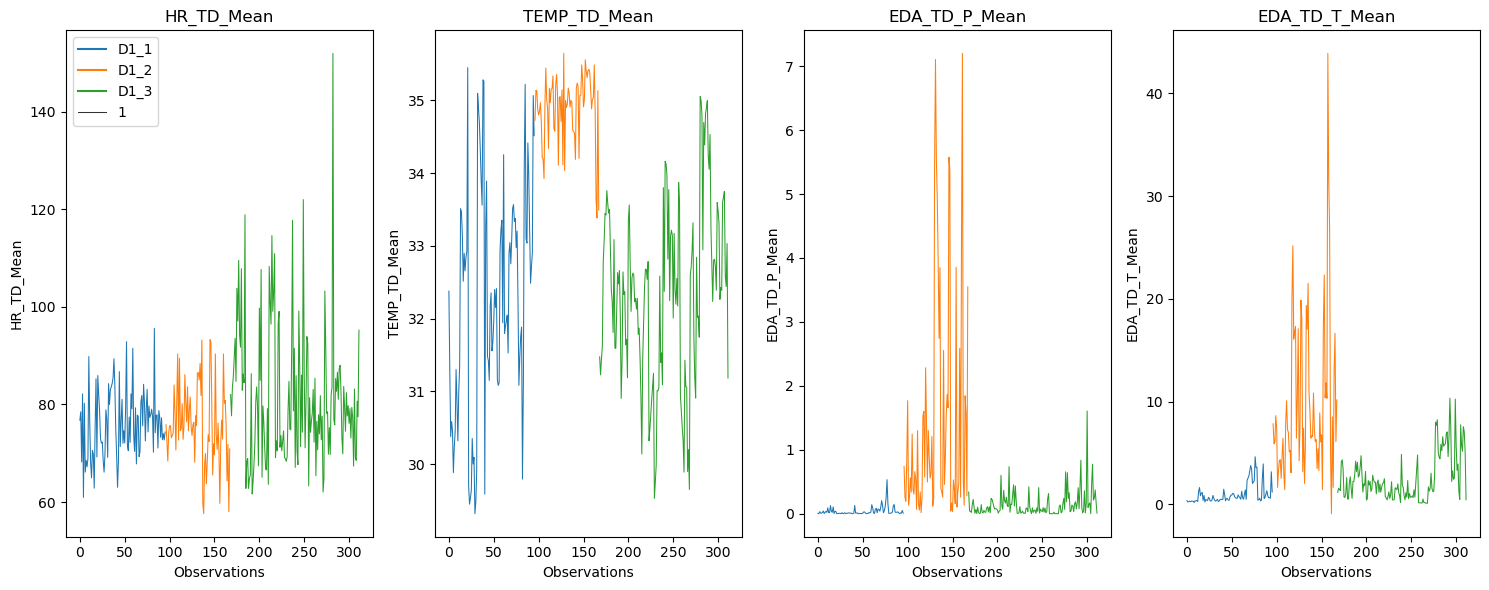

In [9]:
physiological_means = ['HR_TD_Mean', 'TEMP_TD_Mean', 'EDA_TD_P_Mean', 'EDA_TD_T_Mean']
df = data.copy()
# Merge Cohort D1_3, D1_4, D1_5 and D1_6 into D1_3
df['Cohort'] = df['Cohort'].apply(lambda x: 'D1_3' if x in ['D1_4', 'D1_5', 'D1_6'] else x)
# sort by cohort
df.sort_values(by='Cohort', inplace=True)
df.reset_index(drop=True, inplace=True)

# subplot for each physiological measure showing the development of the value with a line for each cohort and each phase, color by cohort
fig, axs = plt.subplots(1,4, figsize=(15,6))

for i, physiological_mean in enumerate(physiological_means):
    sns.lineplot(data=df, x=df.index, y=physiological_mean, hue='Cohort', ax=axs[i], linestyle='-', size=1)
    # sns.lineplot(data=df[df['Phase'] == 'phase2'], x=df[df['Phase'] == 'phase2'].index, y=physiological_mean, hue='Cohort', ax=axs[i], linestyle='-.', size=0.75)
    # sns.lineplot(data=df[df['Phase'] == 'phase3'], x=df[df['Phase'] == 'phase3'].index, y=physiological_mean, hue='Cohort', ax=axs[i], linestyle=':', size=1)
    # sns.lineplot(data=data[(data['Phase'] == 'phase1') & (data['Cohort'] == 'D1_2')], x=data[(data['Phase'] == 'phase1') & (data['Cohort'] == 'D1_2')].index, y=physiological_mean, hue='Cohort', ax=axs[i], linestyle='-.', size=0.5)
    # sns.lineplot(data=data[(data['Phase'] == 'phase1') & (data['Cohort'] == 'D1_3')], x=data[(data['Phase'] == 'phase1') & (data['Cohort'] == 'D1_3')].index, y=physiological_mean, hue='Cohort', ax=axs[i], linestyle=':', size=0.5)
    axs[i].set_title(physiological_mean)
    axs[i].set_ylabel(physiological_mean)
    axs[i].set_xlabel('Observations')
    # no legends
    axs[i].get_legend().remove()
axs[0].legend(loc='upper left')

plt.tight_layout()

plt.show()

In [10]:
data.head()

,HR_TD_Mean,HR_TD_Median,HR_TD_std,HR_TD_Min,HR_TD_Max,HR_TD_AUC,HR_TD_Kurtosis,HR_TD_Skew,HR_TD_Slope_min,HR_TD_Slope_max,...,upset,hostile,alert,ashamed,inspired,nervous,attentive,afraid,active,determined
0,78.663878,76.70,7.480043,67.25,92.48,23048.450,-1.091448,0.369955,-0.7300,0.9775,...,1.0,1.0,2.0,1.0,2.0,2.0,3.0,1.0,2.0,2.0
1,76.540732,76.61,2.584756,69.82,82.33,23959.920,-0.245338,0.338732,-0.3600,0.1900,...,2.0,1.0,3.0,2.0,2.0,2.0,3.0,1.0,3.0,3.0
2,78.173563,77.92,2.681255,72.22,82.80,20324.605,-0.615922,-0.233047,-0.6300,0.3575,...,1.0,1.0,2.0,1.0,3.0,2.0,3.0,2.0,3.0,3.0
3,83.073688,83.88,7.363598,69.42,96.12,24924.300,-0.866610,-0.046021,-0.4650,0.6500,...,1.0,1.0,2.0,1.0,3.0,2.0,3.0,2.0,3.0,3.0
4,72.281250,72.91,3.193762,64.95,79.98,23052.100,0.200401,-0.560948,-0.3725,0.3375,...,3.0,1.0,3.0,2.0,3.0,3.0,4.0,2.0,4.0,4.0


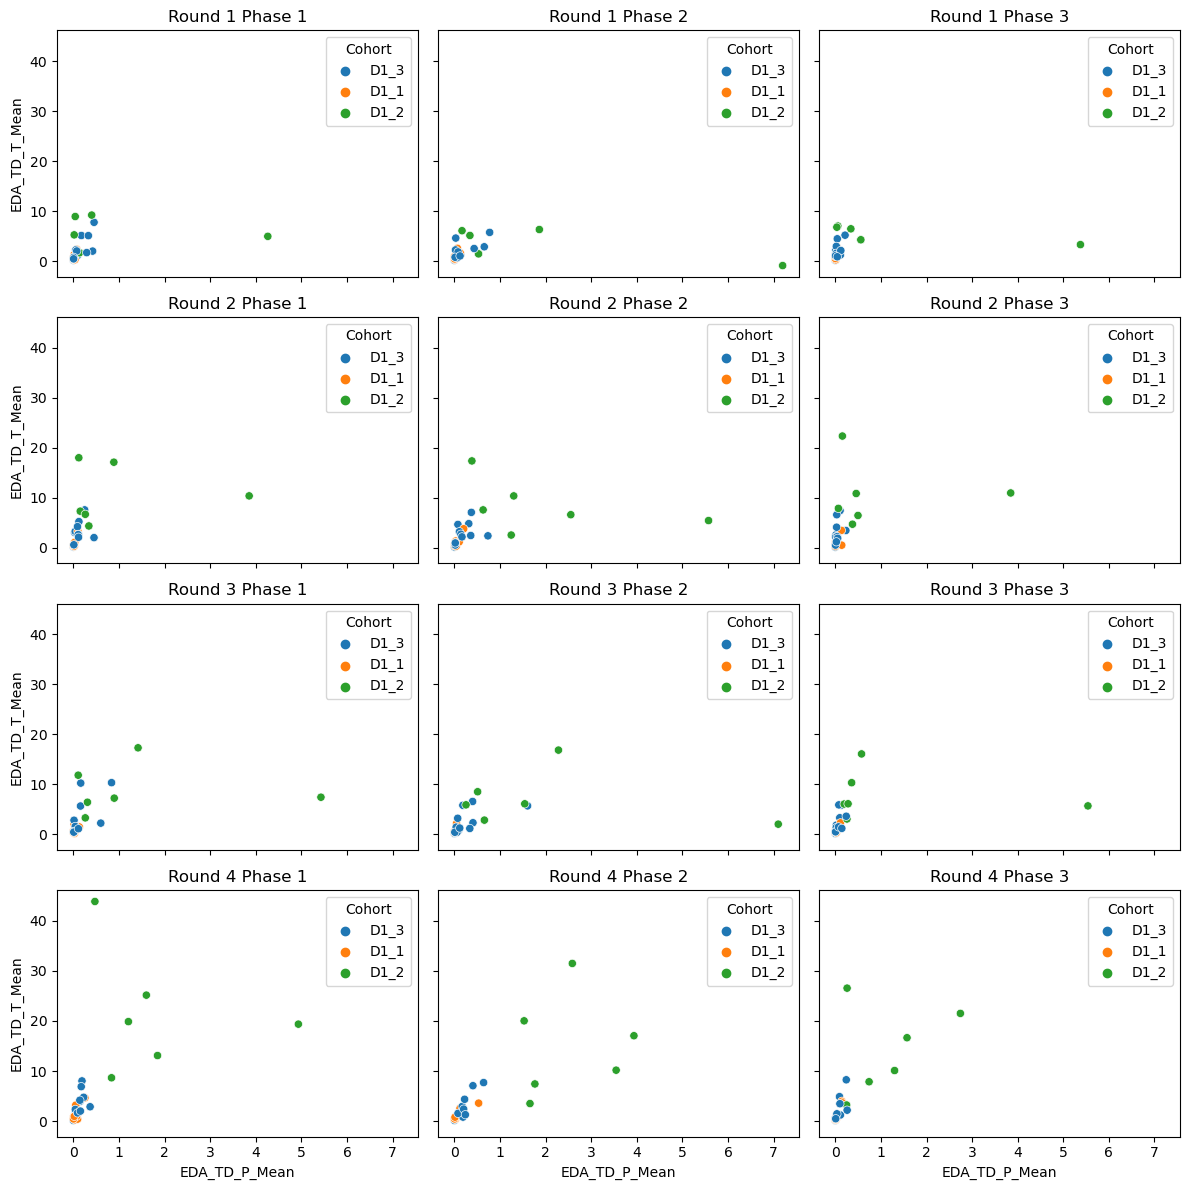

In [11]:
phys_measures = ['EDA_TD_P_Mean', 'EDA_TD_T_Mean']
fig, axs = plt.subplots(4,3, figsize=(12,12), sharey=True, sharex=True)

for i, round_num in enumerate(data['Round'].unique()):
    for j, phase_num in enumerate(data['Phase'].unique()):
        #sns.boxplot(x = 'value', y = 'variable', data = pd.melt(data[(data['Round'] == round_num) & (data['Phase'] == phase_num)][feelings]), ax=axs[i,j], hue='variable')
        sns.scatterplot(data = data[(data['Round'] == round_num) & (data['Phase'] == phase_num)], x="EDA_TD_P_Mean", y="EDA_TD_T_Mean", ax=axs[i,j], hue="Cohort")
        axs[i,j].set_title(f'Round {i+1} Phase {j+1}')
        axs[i,j].set_ylabel("EDA_TD_T_Mean")
        axs[i,j].set_xlabel("EDA_TD_P_Mean")
        # color by feeling


plt.tight_layout()

plt.show()

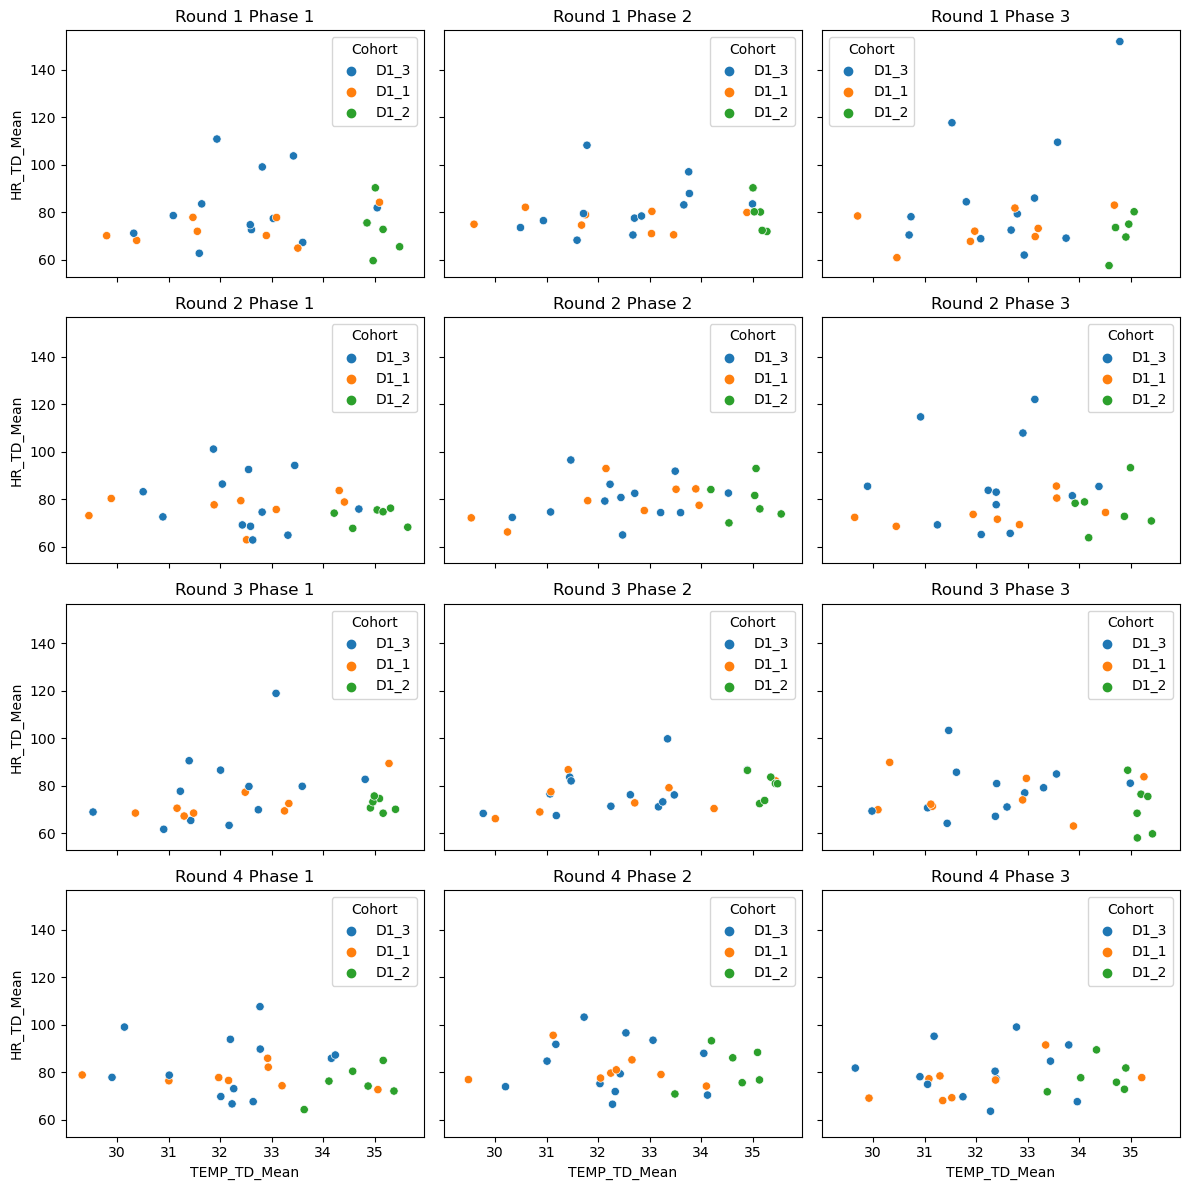

In [12]:
phys_measures = ['TEMP_TD_Mean', 'HR_TD_Mean']
fig, axs = plt.subplots(4,3, figsize=(12,12), sharey=True, sharex=True)

for i, round_num in enumerate(data['Round'].unique()):
    for j, phase_num in enumerate(data['Phase'].unique()):
        #sns.boxplot(x = 'value', y = 'variable', data = pd.melt(data[(data['Round'] == round_num) & (data['Phase'] == phase_num)][feelings]), ax=axs[i,j], hue='variable')
        sns.scatterplot(data = data[(data['Round'] == round_num) & (data['Phase'] == phase_num)], x="TEMP_TD_Mean", y="HR_TD_Mean", ax=axs[i,j], hue="Cohort")
        axs[i,j].set_title(f'Round {i+1} Phase {j+1}')
        axs[i,j].set_ylabel("HR_TD_Mean")
        axs[i,j].set_xlabel("TEMP_TD_Mean")
        # color by feeling


plt.tight_layout()

plt.show()

In [28]:
feelings = ['Frustrated', 'upset', 'hostile', 'alert', 'ashamed', 'inspired', 'nervous', 'attentive', 'afraid', 'active', 'determined']

In [35]:
data.iloc[:, -25:]

,EDA_TD_T_Kurtosis,EDA_TD_T_Skew,EDA_TD_T_Slope_min,EDA_TD_T_Slope_max,EDA_TD_T_Slope_mean,EDA_TD_T_Slope,EDA_TD_P_Peaks,EDA_TD_P_RT,EDA_TD_P_ReT,Round,...,upset,hostile,alert,ashamed,inspired,nervous,attentive,afraid,active,determined
0,1.345997,-1.379434,-0.000144,0.000138,0.000010,1.036040e-05,11,2.522727,2.075000,round_3,...,1.0,1.0,2.0,1.0,2.0,2.0,3.0,1.0,2.0,2.0
1,0.887010,0.854067,-0.000146,0.000165,0.000009,7.714503e-06,15,2.214286,2.192308,round_3,...,2.0,1.0,3.0,2.0,2.0,2.0,3.0,1.0,3.0,3.0
2,0.205817,0.480581,-0.000112,0.000132,0.000002,1.799914e-06,10,1.972222,2.111111,round_3,...,1.0,1.0,2.0,1.0,3.0,2.0,3.0,2.0,3.0,3.0
3,2.488339,1.246665,-0.000455,0.000481,-0.000001,-1.355151e-07,12,1.886364,1.805556,round_2,...,1.0,1.0,2.0,1.0,3.0,2.0,3.0,2.0,3.0,3.0
4,1.196508,1.592099,-0.000420,0.000334,0.000014,1.267198e-05,20,1.812500,1.926471,round_2,...,3.0,1.0,3.0,2.0,3.0,3.0,4.0,2.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,0.171319,1.118577,-0.017405,0.026962,0.001028,1.031675e-03,22,1.829545,1.680556,round_4,...,3.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0
308,0.091560,0.897960,-0.006757,0.012551,0.000182,1.786715e-04,25,1.854167,1.842105,round_4,...,2.0,1.0,3.0,1.0,1.0,1.0,4.0,1.0,3.0,4.0
309,-0.802297,0.123009,-0.017583,0.019661,-0.000374,-2.707034e-04,15,2.100000,2.285714,round_1,...,1.0,1.0,3.0,1.0,3.0,1.0,3.0,1.0,3.0,4.0
310,-1.182989,0.589572,-0.009955,0.019436,0.001485,1.480688e-03,43,1.662791,1.671875,round_1,...,2.0,1.0,3.0,1.0,3.0,1.0,4.0,1.0,4.0,4.0


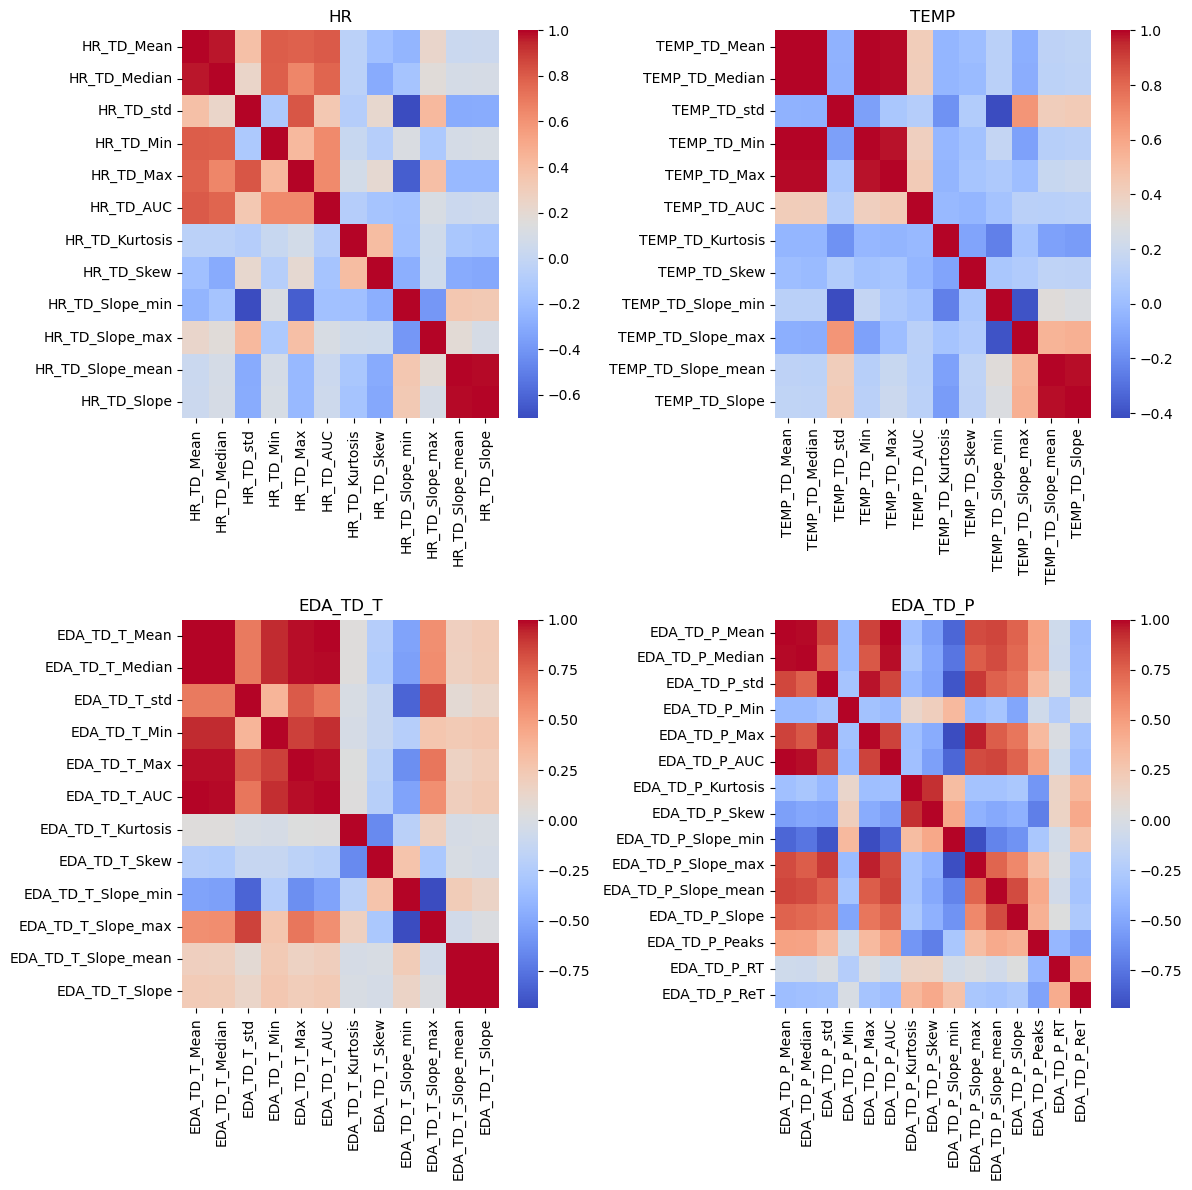

In [30]:
# columns that include HR
hr_cols = [col for col in data.columns if 'HR' in col]
# columns that include TEMP
temp_cols = [col for col in data.columns if 'TEMP' in col]
# columns that include EDA
eda_T_cols = [col for col in data.columns if 'EDA_TD_T' in col]
eda_P_cols = [col for col in data.columns if 'EDA_TD_P' in col]


# make a 2x2 subplot with correlation heatmap for HR, TEMP, EDA_T and EDA_P respectively
fig, axs = plt.subplots(2,2, figsize=(12,12))

sns.heatmap(data[hr_cols].corr(), ax=axs[0,0], cmap='coolwarm')
axs[0,0].set_title('HR')

sns.heatmap(data[temp_cols].corr(), ax=axs[0,1], cmap='coolwarm')
axs[0,1].set_title('TEMP')

sns.heatmap(data[eda_T_cols].corr(), ax=axs[1,0], cmap='coolwarm')
axs[1,0].set_title('EDA_TD_T')

sns.heatmap(data[eda_P_cols].corr(), ax=axs[1,1], cmap='coolwarm')
axs[1,1].set_title('EDA_TD_P')

plt.tight_layout()

plt.show()

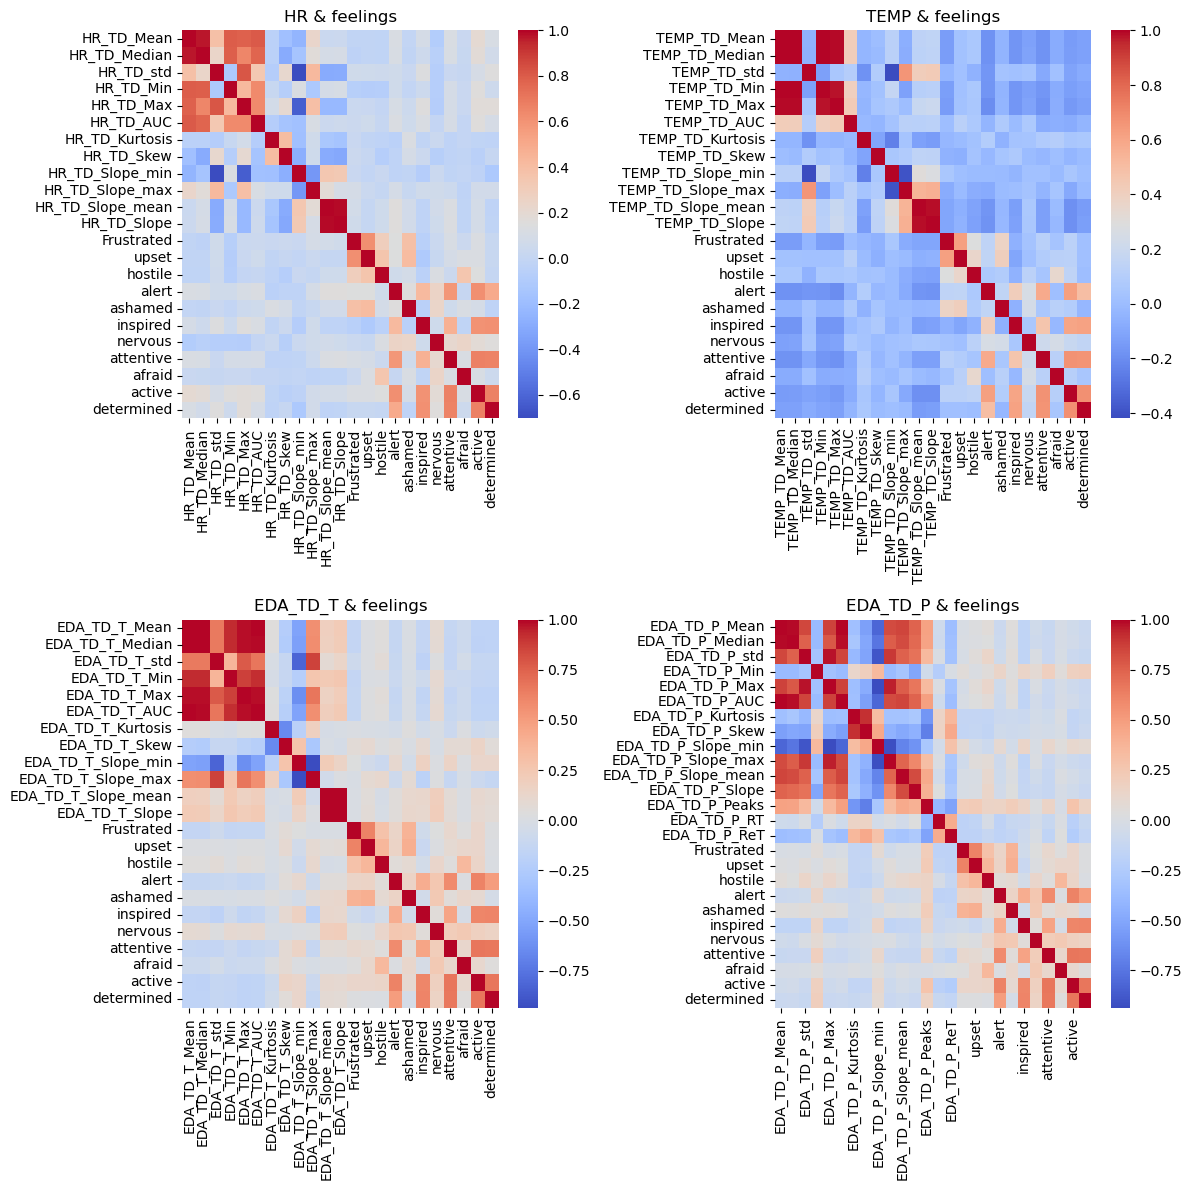

In [29]:
# columns that include HR
hr_cols = [col for col in data.columns if 'HR' in col or col in feelings]
# columns that include TEMP
temp_cols = [col for col in data.columns if 'TEMP' in col or col in feelings]
# columns that include EDA
eda_T_cols = [col for col in data.columns if 'EDA_TD_T' in col or col in feelings]
eda_P_cols = [col for col in data.columns if 'EDA_TD_P' in col or col in feelings]


# make a 2x2 subplot with correlation heatmap for HR, TEMP, EDA_T and EDA_P respectively
fig, axs = plt.subplots(2,2, figsize=(12,12))

sns.heatmap(data[hr_cols].corr(), ax=axs[0,0], cmap='coolwarm')
axs[0,0].set_title('HR & feelings')

sns.heatmap(data[temp_cols].corr(), ax=axs[0,1], cmap='coolwarm')
axs[0,1].set_title('TEMP & feelings')

sns.heatmap(data[eda_T_cols].corr(), ax=axs[1,0], cmap='coolwarm')
axs[1,0].set_title('EDA_TD_T & feelings')

sns.heatmap(data[eda_P_cols].corr(), ax=axs[1,1], cmap='coolwarm')
axs[1,1].set_title('EDA_TD_P & feelings')

plt.tight_layout()

plt.show()